importing numpy, pandas, seaborn, matplotlib python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

reading csv file and import it to a python dataframe

In [2]:
data = pd.read_csv("train_LZdllcl.csv",index_col='employee_id')

In [3]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
data.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


we have a total of 54808 rows in the dataset

In [6]:
#finding out how many missing values(null values) in dataset
data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

we can see here there are total of 2409 values missing in education column;
In previous_year_rating column there are 4124 missing values, previous_year_rating values are missing because they have joined company newly.

We can treat the missing values of previous_year_rating by exploring the data further. In next steps will explore how can we treat missing values of previous_year_rating.

Missing values of previous_years_rating can be derived approximately by finding the relation between other parameters in the dataset such as:

1. KPIs_met >80%(Percent of KPIs(Key performance Indicators) >80% then 1 else 0).
2. awards won (awards won during previous year then 1 else 0) and.
3. avg_training_score (Average score in current training evaluations).

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


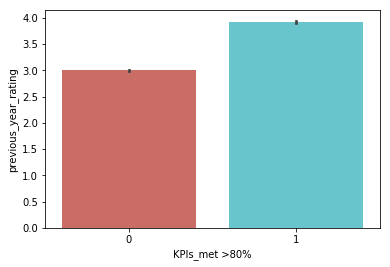

In [7]:
#plotting barplot on x-axis with parameter KPIs_met and on y-axis previous_year_rating
sns.barplot(x='KPIs_met >80%',y='previous_year_rating',data=data,palette='hls')

if employee has met KPIs_met then avg previous_year_rating is close to 4 else avg previous_year_rating is around 3.
we can fill the null values of previous_year_rating who has met KPI target with value 4.

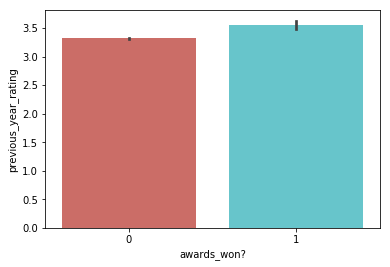

In [8]:
#plotting barplot on x-axis with parameter awards_won? and on y-axis previous_year_rating
sns.barplot(x='awards_won?',y='previous_year_rating',data=data,palette='hls')

if employee has met KPIs_met then avg previous_year_rating is around 3.6 else avg previous_year_rating is around 3.3.
we can fill the previous_year_rating values as 4 who has won awards.

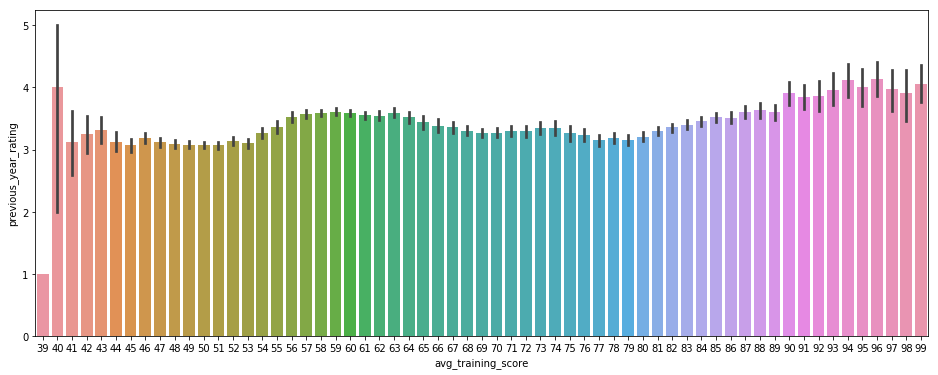

In [9]:
#plotting barplot on x-axis with parameter avg_training_score and on y-axis previous_year_rating
plt.figure(figsize=(16, 6))
sns.barplot(x='avg_training_score',y='previous_year_rating',data=data)

We can see from the above plot if the avg_training_score is more than 90, then employees avg previous_year_rating is around 4.
we can fill the missing values of previous_year_rating of employees with 4 if avg_training_score is more than 90.

## Treating Missing values

Treating null values of previous_year_rating with the following condition:
1. if previous_year_rating is null and avg_training_score more than 90 then previous_year_rating can take value of 4.
2. if previous_year_rating is null and 'KPIs_met >80%' then previous_year_rating can take value of 4.
3. if previous_year_rating is null and 'awards_won'=1 then previous_year_rating can take value of 4.

In [10]:
data.loc[(data['avg_training_score'] >= 90) & (pd.isnull(data.previous_year_rating)),'previous_year_rating'] = 4
data.loc[(data['KPIs_met >80%'] == 1) & (pd.isnull(data.previous_year_rating)),'previous_year_rating'] = 4
data.loc[(data['awards_won?'] == 1) & (pd.isnull(data.previous_year_rating)),'previous_year_rating'] = 4

Treating the rest of missing values of previous_year_rating with value as 3.

In [11]:
data['previous_year_rating'].fillna(3, inplace=True)

In [12]:
data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
#dropping the rows which have the missing values of education column
data = data.dropna()

by the dropping the missing values of education column values, 2409 rows got deleted, rows in the dataset size reduced to 52399

In [14]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


## Creating Dummies for Categorical Variables

Converting categorical variable education into dummy categories, dropping the first column, here the Bachelor's degree category is dropped.

In [15]:
education = pd.get_dummies(data.education, drop_first=True)

In [16]:
education.head()

,Below Secondary,Master's & above
employee_id,,
65438,0,1
65141,0,0
7513,0,0
2542,0,0
48945,0,0


similary for variables region, trainings, rating, department, gender and recruitment_channel we can create dummy categories

In [17]:
#similary for variables region, trainings, rating, department, gender and recruitment_channel we can create dummy categories
region = pd.get_dummies(data.region,drop_first=True)
trainings = pd.get_dummies(data.no_of_trainings,drop_first=True)
rating = pd.get_dummies(data.previous_year_rating,drop_first=True)
department = pd.get_dummies(data.department,drop_first=True)
gender = pd.get_dummies(data.gender,drop_first=True)
recruitment_channel = pd.get_dummies(data.recruitment_channel,drop_first=True)

merging created dummy categories with original data

In [18]:
traindata = pd.concat([data,region,education,department,trainings, gender,rating,recruitment_channel], axis=1)

In [19]:
traindata.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,...,8,9,10,m,2.0,3.0,4.0,5.0,referred,sourcing
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,...,0,0,0,0,0,0,0,1,0,1
65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,...,0,0,0,1,0,0,0,1,0,0
7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,...,0,0,0,1,0,1,0,0,0,1
2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,...,0,0,0,1,0,0,0,0,0,0
48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,...,0,0,0,1,0,1,0,0,0,0


dropping the columns names from datfarame which we have created dummy categories

In [20]:
traindata = traindata.drop(columns=['department','region','education','gender','recruitment_channel','no_of_trainings','previous_year_rating'])

traindata.to_csv('hr-total-cat.csv',index=False)

Exporting the cleaned dataset for further predictive analysis

In [21]:
traindata = pd.read_csv("hr-total-cat1.csv",index_col=0)

In [22]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52399 entries, 65438 to 51526
Data columns (total 65 columns):
age                   52399 non-null int64
length_of_service     52399 non-null int64
KPIs_met >80%         52399 non-null int64
awards_won?           52399 non-null int64
avg_training_score    52399 non-null int64
is_promoted           52399 non-null int64
region_10             52399 non-null int64
region_11             52399 non-null int64
region_12             52399 non-null int64
region_13             52399 non-null int64
region_14             52399 non-null int64
region_15             52399 non-null int64
region_16             52399 non-null int64
region_17             52399 non-null int64
region_18             52399 non-null int64
region_19             52399 non-null int64
region_2              52399 non-null int64
region_20             52399 non-null int64
region_21             52399 non-null int64
region_22             52399 non-null int64
region_23             52399

after cleaning the dataset we have 52399 columns in our dataset

In [23]:
traindata['is_promoted'].value_counts()

0    47853
1     4546
Name: is_promoted, dtype: int64

we have a 47853 employees ids who are not promoted and 4546 employees ids who are promoted.

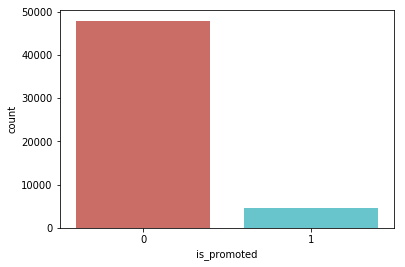

In [24]:
sns.countplot(x='is_promoted',data=traindata,palette='hls')

This is a skewed dataset, with unbalanced proportion of is_promoted count,
we balance this dataset by duplicating rows of is_promoted = 1 by 9 times.

In [25]:
traindata.to_csv('hr-total-cat-unbalanced.csv')